<a href="https://colab.research.google.com/github/oyyarko/deeplearning_cnn/blob/master/multi_label_movie_prediction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.chdir('/content/drive/My Drive/Deep Learning Cloud')

In [12]:
!pip install tensorflow-gpu==2.0.0-rc0

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [0]:
from tensorflow.keras.layers import Flatten, BatchNormalization, Conv2D, MaxPool2D

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [16]:
tf.__version__

'2.0.0-rc0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [0]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Counting objects: 100% (7873/7873), done.
remote: Compressing objects: 100% (7873/7873), done.
remote: Total 7873 (delta 1), reused 7872 (delta 0), pack-reused 0
Receiving objects: 100% (7873/7873), 246.59 MiB | 23.45 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [8]:
data = pd.read_csv('Movies-Poster_Dataset/train.csv')
data.shape

(7254, 27)

In [19]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
    path = "Movies-Poster_Dataset/Images/" + data['Id'][i] + ".jpg"
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [44:11<00:00,  2.74it/s]


In [20]:
X.shape

(7254, 350, 350, 3)

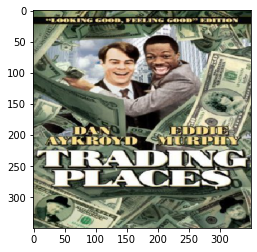

In [21]:
plt.imshow(X[2])

In [22]:
data['Genre'][2]

"['Comedy']"

In [23]:
y = data.drop(['Id', 'Genre'], axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

## CNN

In [0]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(X_train[0].shape)))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test)) 

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 205s 33ms/sample - loss: 0.6956 - accuracy: 0.6471 - val_loss: 2.1217 - val_accuracy: 0.5734
Epoch 2/5
6165/6165 [==============================] - 191s 31ms/sample - loss: 0.3137 - accuracy: 0.8914 - val_loss: 0.2470 - val_accuracy: 0.9078
Epoch 3/5
6165/6165 [==============================] - 195s 32ms/sample - loss: 0.2624 - accuracy: 0.9063 - val_loss: 0.2442 - val_accuracy: 0.9074
Epoch 4/5
6165/6165 [==============================] - 191s 31ms/sample - loss: 0.2532 - accuracy: 0.9080 - val_loss: 0.2481 - val_accuracy: 0.9096
Epoch 5/5
6165/6165 [==============================] - 193s 31ms/sample - loss: 0.2470 - accuracy: 0.9103 - val_loss: 0.2377 - val_accuracy: 0.9100


In [0]:
def plot_learningCurve(history, epoch):
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc="upper left")
    plt.show()

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc="upper left")
    plt.show()

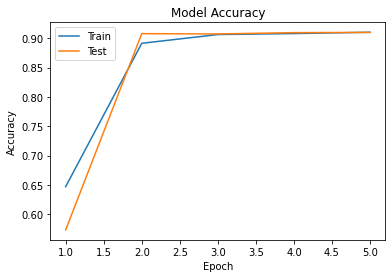

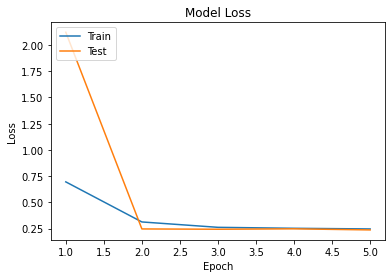

In [31]:
plot_learningCurve(history, 5)

In [46]:
!wget https://images-na.ssl-images-amazon.com/images/I/71Lp3d0KnML._AC_SL1500_.jpg

--2020-03-26 09:50:08--  https://images-na.ssl-images-amazon.com/images/I/71Lp3d0KnML._AC_SL1500_.jpg
Resolving images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)... 151.101.1.16, 151.101.65.16, 151.101.129.16, ...
Connecting to images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)|151.101.1.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91726 (90K) [image/jpeg]
Saving to: ‘71Lp3d0KnML._AC_SL1500_.jpg’

71Lp3d0KnML._AC_SL1 100%[===================>]  89.58K  --.-KB/s    in 0.02s   

2020-03-26 09:50:09 (3.97 MB/s) - ‘71Lp3d0KnML._AC_SL1500_.jpg’ saved [91726/91726]



Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Action
Crime


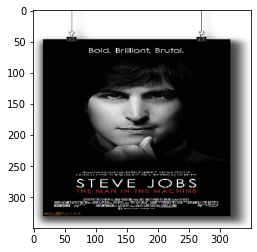

In [47]:
#path = "Movies-Poster_Dataset/Images/" + data['Id'][i] + ".jpg"
#!wget https://images-na.ssl-images-amazon.com/images/I/61rVNuYkdNL._SY550_.jpg as "lala.jpg"
img = image.load_img('Movies-Poster_Dataset/jobs.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

print(classes)

y_prob = model.predict(img)

top_3_prediction = np.argsort(y_prob[0])[:-4:-1]
top_3_prediction

for i in range(3):
    print(classes[top_3_prediction[i]])